In [43]:
import import_ipynb
import tumor_identifier as ti
import model1 as m1

## Traing the Dumb Model

In [44]:
mri_dataset =ti.MRI()
mri_dataset.normalize()
device = ti.torch.device('cuda:0')
model = ti.CNN().to(device)

In [45]:
eta = 0.0001
EPOCH =400 
optimizer = ti.torch.optim.Adam(model.parameters(), lr=eta)
dataloader =ti.DataLoader(mri_dataset, batch_size=32, shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [46]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image'].to(device)
        label = D['label'].to(device)
        y_hat = model(data)
        # define loss function
        error = ti.nn.BCELoss() 
        loss = ti.torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, ti.np.mean(losses)))

Train Epoch: 10	Loss: 0.562822
Train Epoch: 20	Loss: 0.454098
Train Epoch: 30	Loss: 0.408908
Train Epoch: 40	Loss: 0.377487
Train Epoch: 50	Loss: 0.344260
Train Epoch: 60	Loss: 0.319445
Train Epoch: 70	Loss: 0.304298
Train Epoch: 80	Loss: 0.288531
Train Epoch: 90	Loss: 0.255924
Train Epoch: 100	Loss: 0.237563
Train Epoch: 110	Loss: 0.220747
Train Epoch: 120	Loss: 0.202934
Train Epoch: 130	Loss: 0.184048
Train Epoch: 140	Loss: 0.165356
Train Epoch: 150	Loss: 0.137758
Train Epoch: 160	Loss: 0.116075
Train Epoch: 170	Loss: 0.103139
Train Epoch: 180	Loss: 0.094595
Train Epoch: 190	Loss: 0.076119
Train Epoch: 200	Loss: 0.064830
Train Epoch: 210	Loss: 0.045823
Train Epoch: 220	Loss: 0.036243
Train Epoch: 230	Loss: 0.025349
Train Epoch: 240	Loss: 0.016224
Train Epoch: 250	Loss: 0.009116
Train Epoch: 260	Loss: 0.005811
Train Epoch: 270	Loss: 0.003904
Train Epoch: 280	Loss: 0.002355
Train Epoch: 290	Loss: 0.098880
Train Epoch: 300	Loss: 0.001859
Train Epoch: 310	Loss: 0.001336
Train Epoch: 320	

In [47]:
model.eval()
dataloader = ti.DataLoader(mri_dataset, batch_size=32, shuffle=False)
outputs=[]
y_true = []
with ti.torch.no_grad():
    for D in dataloader:
        image =  D['image'].to(device)
        label = D['label'].to(device)
        
        y_hat = model(image)
        
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
        
outputs = ti.np.concatenate( outputs, axis=0 )
y_true = ti.np.concatenate( y_true, axis=0 )

In [48]:
m1.accuracy_score(y_true, m1.threshold(outputs))

1.0

[Text(0, 0.5, 'tumor'), Text(0, 1.5, 'Healthy')]

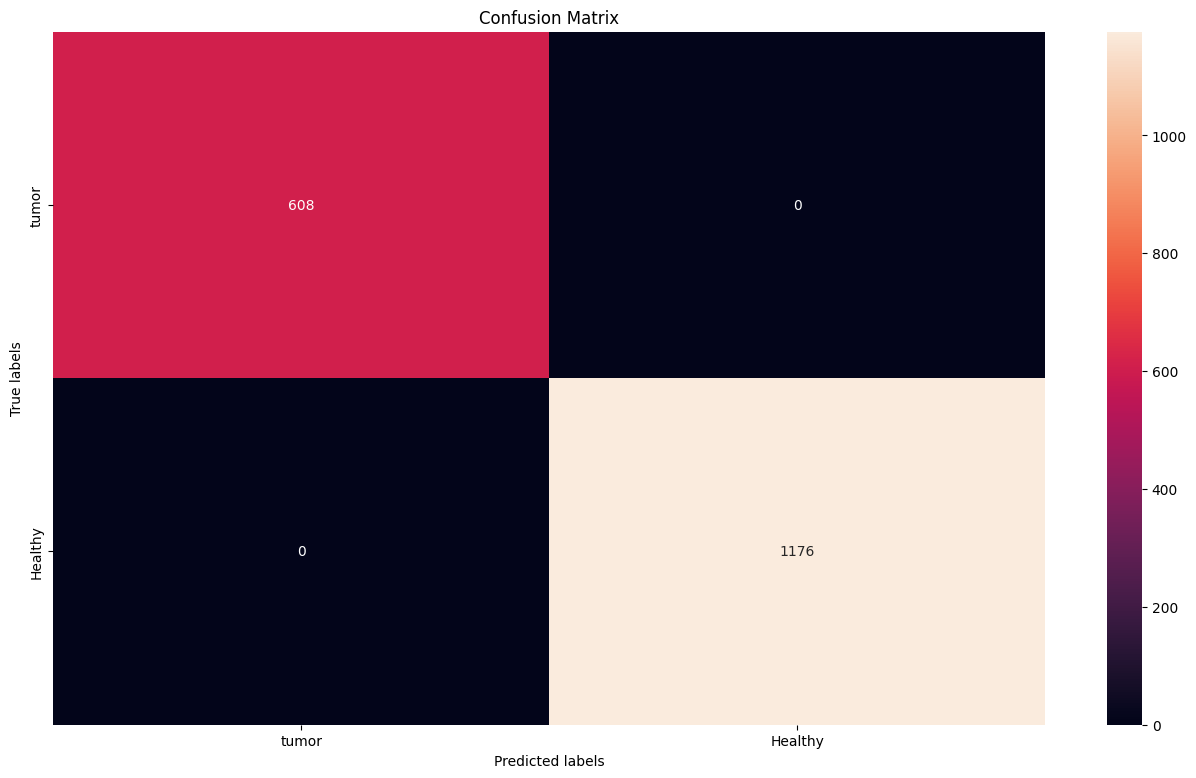

In [49]:
# Generate a confusion matrix using seaborn to visualize model performance
# cm: confusion matrix values
# annot=True: show values in each cell 
# fmt='g': format values in matrix without scientific notation
# ax: matplotlib subplot to draw heatmap on
# Labels, title, ticks: customize axis labels, plot title, tick labels
import seaborn as sns
cm = m1.confusion_matrix(y_true, m1.threshold(outputs))
ti.plt.figure(figsize=(16,9))

ax= ti.plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['tumor','Healthy'])
ax.yaxis.set_ticklabels(['tumor','Healthy'])

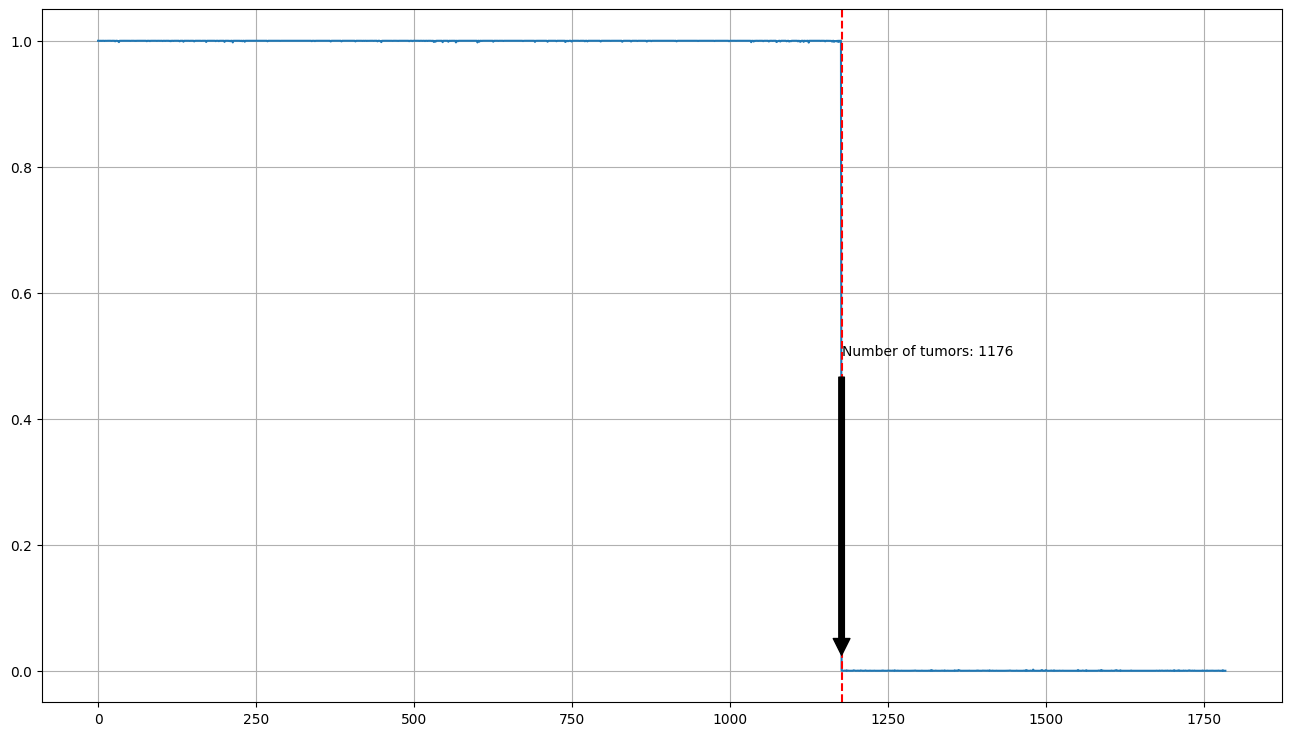

In [50]:
ti.plt.figure(figsize=(16,9))
ti.plt.plot(outputs)
ti.plt.axvline(x=len(ti.tumor), color='r', linestyle='--')

ti.plt.annotate('Number of tumors: {}'.format(len(ti.tumor)), 
             xy=(len(ti.tumor), 0), 
             xytext=(len(ti.tumor), 0.5),  # This specifies the location of the text
             arrowprops=dict(facecolor='black', shrink=0.05))
ti.plt.grid()

In [51]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [52]:
no_of_layers = 0
conv_layers = []

In [53]:
model_children=list(model.children())
model_children

[Sequential(
   (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
   (1): Tanh()
   (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
   (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
   (4): Tanh()
   (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
 ),
 Sequential(
   (0): Linear(in_features=256, out_features=120, bias=True)
   (1): Tanh()
   (2): Linear(in_features=120, out_features=84, bias=True)
   (3): Tanh()
   (4): Linear(in_features=84, out_features=1, bias=True)
 )]

In [54]:
for child in model_children:
    if type(child)==ti.nn.Sequential:
        for layer in child.children():
            if type(layer)==ti.nn.Conv2d:
                no_of_layers+=1
                conv_layers.append(layer)
  

In [55]:
conv_layers

[Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)),
 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))]

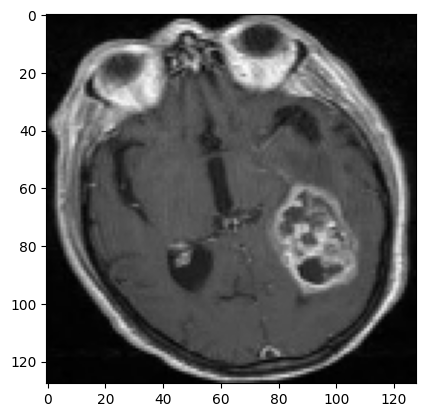

In [56]:
img=mri_dataset[1]['image']
ti.plt.imshow(img.reshape(128,128,3), cmap='gray')

In [57]:
img=ti.torch.from_numpy(img).to(device)

In [58]:
img.shape
img=img.unsqueeze(0)
img.shape

torch.Size([1, 3, 128, 128])

In [59]:
results=[conv_layers[0](img)]
for i in range(1,len(conv_layers)):
    results.append(conv_layers[i](results[i-1]))
outputs=results

In [60]:
len(outputs)
outputs[0].shape
outputs[1].shape


torch.Size([1, 16, 120, 120])

Layer 1


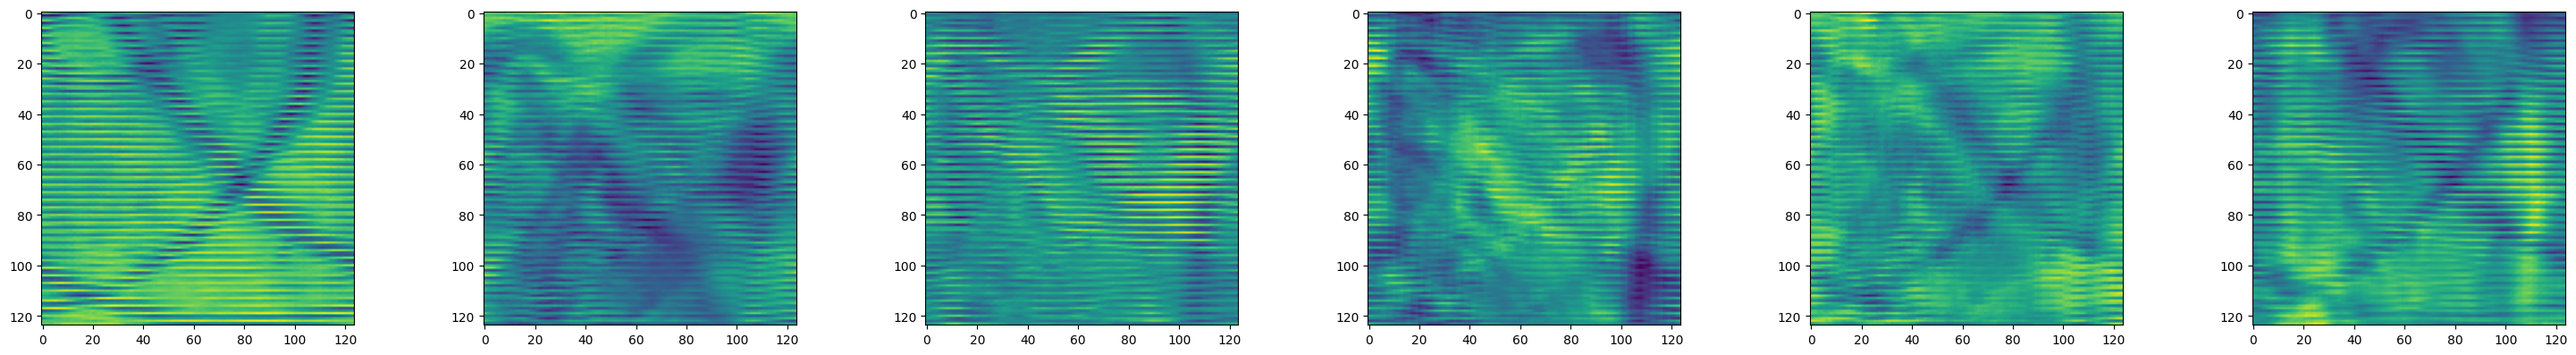

Layer 2


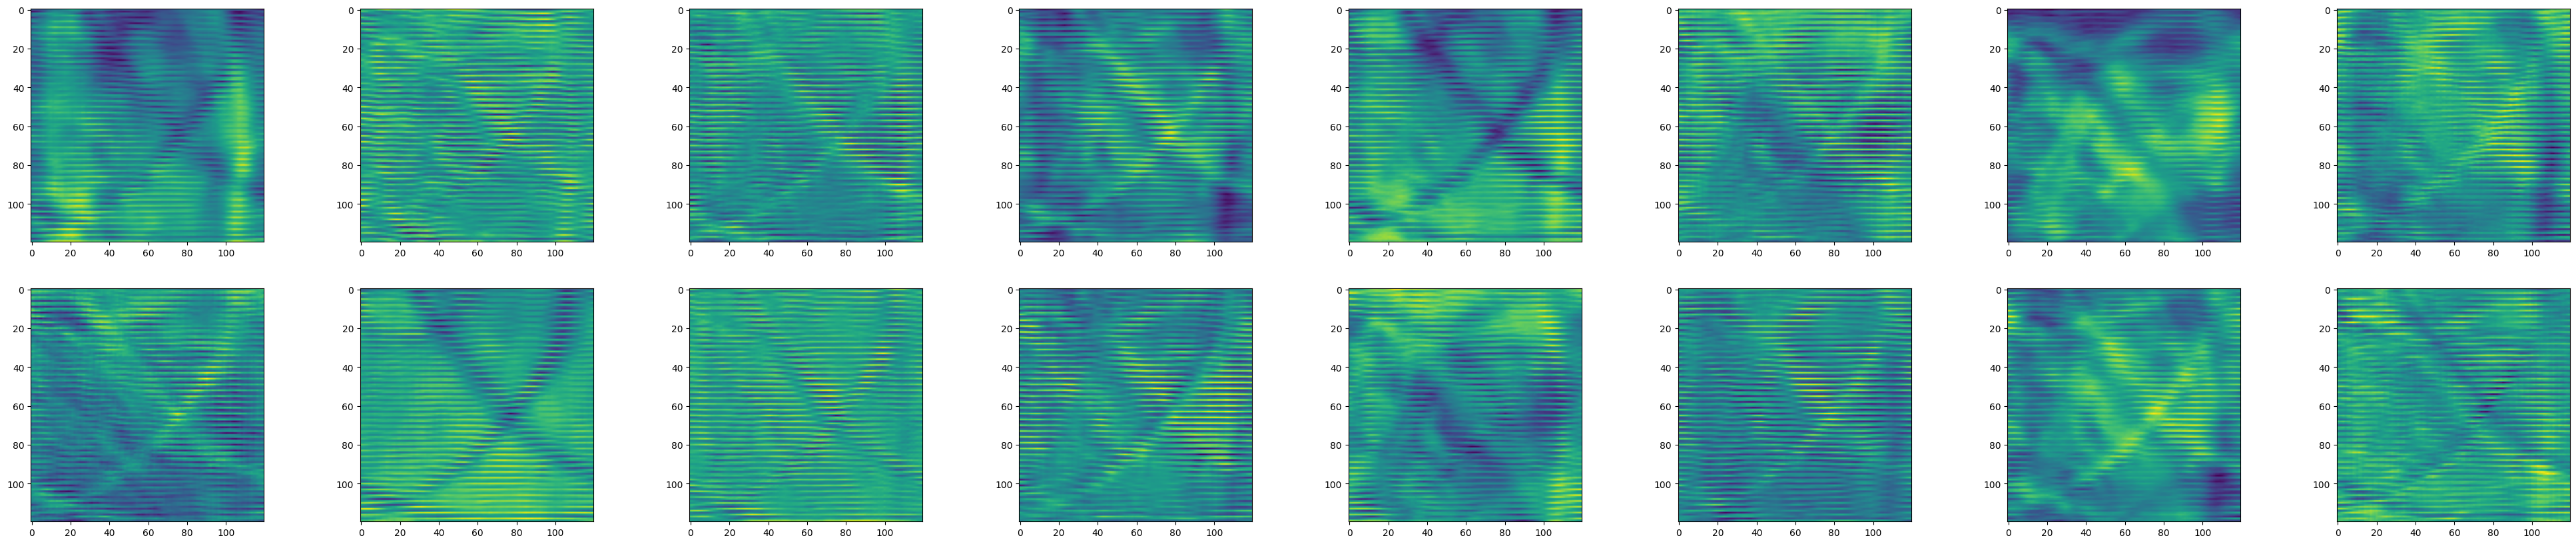

In [61]:
for num_layer in range(len(outputs)):
    ti.plt.figure(figsize=(50, 10))
    layer_viz=outputs[num_layer].squeeze()
    print("Layer",num_layer+1)
    for i, f in enumerate(layer_viz):
        ti.plt.subplot(2,8,i+1)
        ti.plt.imshow(f.detach().cpu().numpy())
        # ti.plt.axis('off')
    ti.plt.show()
    ti.plt.close()



Layer 2


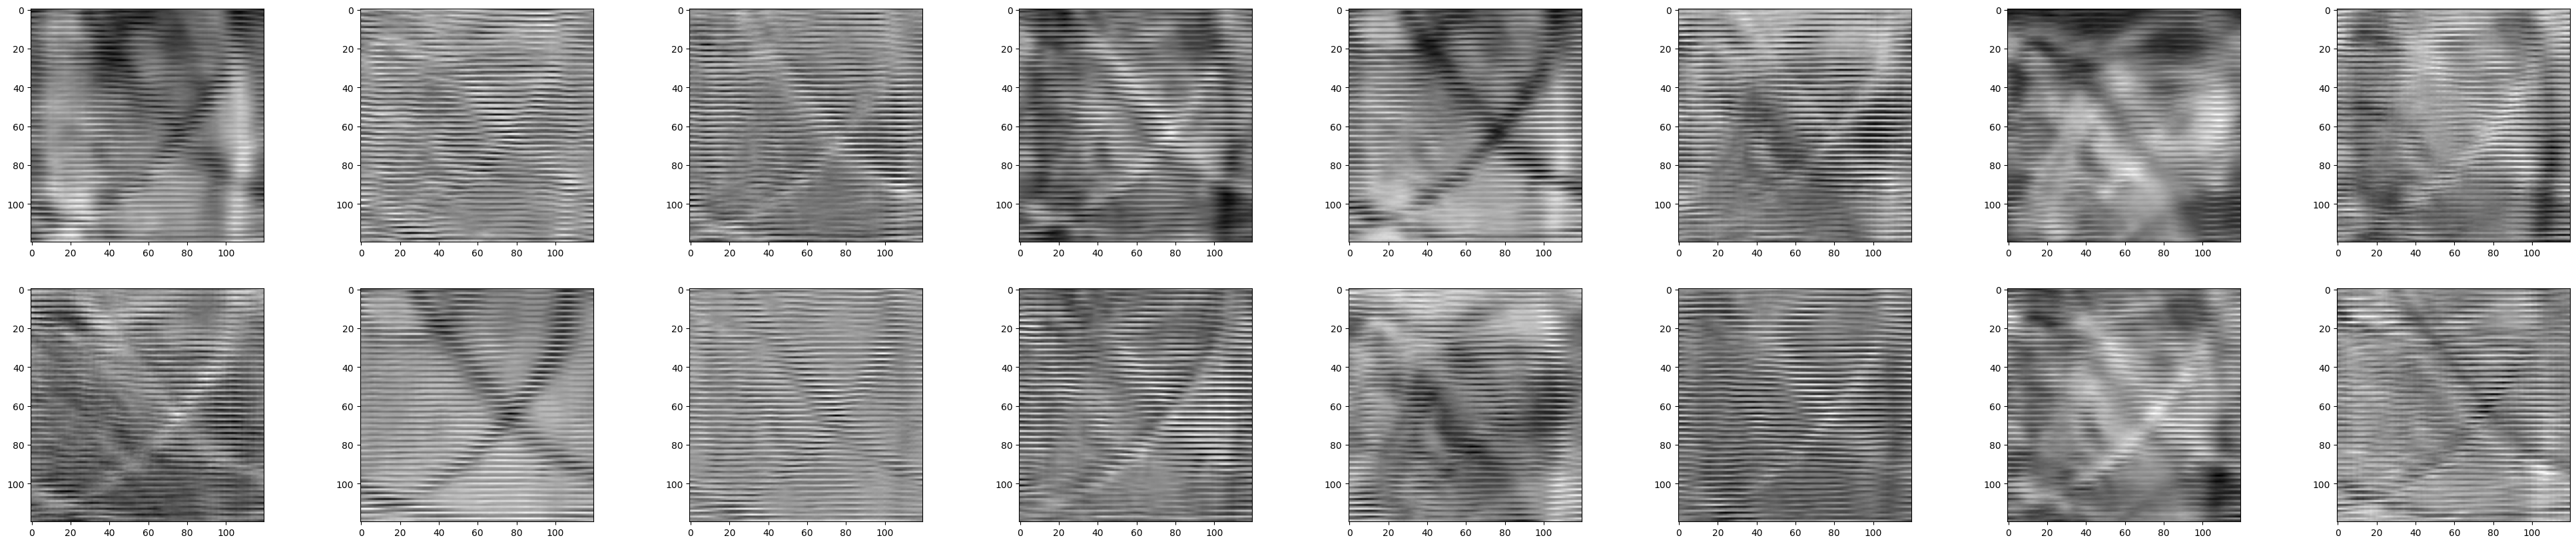

In [64]:
# Assuming 'outputs' is a list of outputs from each layer in your model
for num_layer in range(len(outputs)//2, len(outputs)):  # Start from the middle layer
    ti.plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer].squeeze()
    print("Layer", num_layer+1)
    for i, f in enumerate(layer_viz):
        ti.plt.subplot(2, 8, i+1)
        ti.plt.imshow(f.detach().cpu().numpy(), cmap='gray')  # Use grayscale colormap
        # ti.plt.axis('off')
    ti.plt.show()
    ti.plt.close()
